In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set()

In [2]:
import sigma_equation as se

In [26]:
#cecita, complessita, disistima_espressa, disistima_ricevuta, rifiuto_effettivo

In [28]:
activations = np.arange(0, 1.01, 0.01)
sigmas_isomorfa = []
sigmas_tensione_interna = []
sigmas_tensione_esterna = []
sigmas_differenza_tensioni = []
for set_activation in activations:
    sigmas_isomorfa.append(se.sigma_equation(cecita=set_activation,complessita=set_activation,disistima_espressa=set_activation,disistima_ricevuta=set_activation,rifiuto_effettivo=set_activation))
    sigmas_tensione_interna.append(se.sigma_equation(cecita=set_activation,complessita=set_activation,disistima_espressa=set_activation,disistima_ricevuta=1,rifiuto_effettivo=1))
    sigmas_tensione_esterna.append(se.sigma_equation(cecita=1,complessita=1,disistima_espressa=set_activation,disistima_ricevuta=set_activation,rifiuto_effettivo=set_activation))
# set "sigmas_differenza_tensioni" as the difference between "sigmas_tensione_interna" and "sigmas_tensione_esterna"
sigmas_differenza_tensioni = [x - y for x, y in zip(sigmas_tensione_interna, sigmas_tensione_esterna)]

In [29]:
df_isomorfa = pd.DataFrame({
    'cecita':activations,
    'complessita':activations,
    'disistima_espressa':activations,
    'disistima_ricevuta':activations,
    'rifiuto_effettivo':activations,
    'sigma':sigmas_isomorfa})
df_isomorfa = df_isomorfa.transpose()
df_isomorfa.columns.name = "Punti della curva"
df_isomorfa

Punti della curva   0         1         2         3         4          5    \
cecita              0.0  0.010000  0.020000  0.030000  0.040000   0.050000   
complessita         0.0  0.010000  0.020000  0.030000  0.040000   0.050000   
disistima_espressa  0.0  0.010000  0.020000  0.030000  0.040000   0.050000   
disistima_ricevuta  0.0  0.010000  0.020000  0.030000  0.040000   0.050000   
rifiuto_effettivo   0.0  0.010000  0.020000  0.030000  0.040000   0.050000   
sigma               0.0  2.019801  4.078416  6.174681  8.307455  10.475622   

Punti della curva         6          7          8          9    ...  \
cecita               0.060000   0.070000   0.080000   0.090000  ...   
complessita          0.060000   0.070000   0.080000   0.090000  ...   
disistima_espressa   0.060000   0.070000   0.080000   0.090000  ...   
disistima_ricevuta   0.060000   0.070000   0.080000   0.090000  ...   
rifiuto_effettivo    0.060000   0.070000   0.080000   0.090000  ...   
sigma               12.678088  14.913781  17.181652  19.480674  ...   

Punti della curva          91          92          93          94   \
cecita                0.910000    0.920000    0.930000    0.940000   
complessita           0.910000    0.920000    0.930000    0.940000   
disistima_espressa    0.910000    0.920000    0.930000    0.940000   
disistima_ricevuta    0.910000    0.920000    0.930000    0.940000   
rifiuto_effettivo     0.910000    0.920000    0.930000    0.940000   
sigma               332.308965  339.554867  346.840109  354.173328   

Punti della curva          95          96          97          98   \
cecita                0.950000    0.960000    0.970000    0.980000   
complessita           0.950000    0.960000    0.970000    0.980000   
disistima_espressa    0.950000    0.960000    0.970000    0.980000   
disistima_ricevuta    0.950000    0.960000    0.970000    0.980000   
rifiuto_effettivo     0.950000    0.960000    0.970000    0.980000   
sigma               361.567187  369.037222  376.600312  384.272931   

Punti della curva          99     100  
cecita                0.990000    1.0  
complessita           0.990000    1.0  
disistima_espressa    0.990000    1.0  
disistima_ricevuta    0.990000    1.0  
rifiuto_effettivo     0.990000    1.0  
sigma               392.069351  400.0  

[6 rows x 101 columns]

In [30]:
# create a dataframe for the data
df_curve = pd.DataFrame({'isomorfa': sigmas_isomorfa, 'tensione_interna': sigmas_tensione_interna, 'tensione_esterna': sigmas_tensione_esterna, 'differenza_tensioni': sigmas_differenza_tensioni}, index=activations)
df_curve

isomorfa  tensione_interna  tensione_esterna  differenza_tensioni
0.00    0.000000          0.000000          0.000000             0.000000
0.01    2.019801          2.009800          0.019999             1.989801
0.02    4.078416          4.038400          0.079984             3.958416
0.03    6.174681          6.084600          0.179919             5.904681
0.04    8.307455          8.147199          0.319744             7.827456
...          ...               ...               ...                  ...
0.96  369.037222        191.942566        177.098701            14.843865
0.97  376.600312        193.981031        182.620568            11.360463
0.98  384.272931        195.996115        188.277071             7.719044
0.99  392.069351        197.999750        194.069617             3.930133
1.00  400.000000        200.000000        200.000000             0.000000

[101 rows x 4 columns]

In [40]:
# plot the df_curve as a line plot
fig = px.line(df_curve, x=df_curve.index, y=df_curve.columns, title='Sigma Equations', width=1000, height=600)
# show xticks as percentages between 0 and 100
fig.update_xaxes(dtick=0.1, tickformat=".0%")
# set the x and y axis titles
fig.update_xaxes(title_text='Activation')
fig.update_yaxes(title_text='Sigma')
# change the legend title
fig.update_layout(legend_title_text='Curve')
# show the entire name of the curve in the hover box
fig.update_traces(hovertemplate='%{y:.2f}')
# show the plot
# display legend on the left side inside the plot
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
# highlight the y value of 116
fig.add_shape(
    type="line",
    x0=0,
    y0=116,
    x1=1,
    y1=116,
    line=dict(
        color="grey",
        width=2,
        dash="dot",
    ),
)
fig.show()

In [5]:
tensore_equazione_sigma = np.zeros(shape = (11,11,11,11,11))
for cecita in range(0,11):
    for complessita in range(0,11):
        for disistima_espressa in range(0,11):
            for disistima_ricevuta in range(0,11):
                for rifiuto_effettivo in range(0,11):
                        tensore_equazione_sigma[cecita,complessita,disistima_espressa,disistima_ricevuta,rifiuto_effettivo] = se.sigma_equation(cecita/10,complessita/10,disistima_espressa/10,disistima_ricevuta/10,rifiuto_effettivo/10)

In [6]:
# generate a numpy arrays of numbers from 0 to 1 with step 0.1
x = np.arange(0, 1.1, 0.1)
y = np.arange(0, 1.1, 0.1)
x, y

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [7]:
tensore_equazione_sigma[0,0,0,:,:].shape

(11, 11)

In [8]:
tensore_equazione_sigma[0,0,0,:,:]

array([[  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.],
       [  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.],
       [  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.],
       [  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.],
       [  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.],
       [  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.],
       [  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.],
       [  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.],
       [  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.],
       [  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.],
       [  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.]])

In [10]:
fig = go.Figure(data=[go.Surface(x = x, y = y, z=tensore_equazione_sigma[10,10,10,:,:])])
fig.update_layout(title='Sigma equation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
                  )
fig.show()

In [11]:
# flatten the tensore_equazione_sigma
tensore_equazione_sigma_flat = tensore_equazione_sigma.flatten()
# sort the flattened tensore_equazione_sigma
tensore_equazione_sigma_flat.sort()
# distribution plot of all the values of the tensore_equazione_sigma, use percentage as y axis using plotly express
fig = px.histogram(tensore_equazione_sigma_flat, x = tensore_equazione_sigma_flat, nbins = 200, histnorm = 'percent')
fig.update_layout(title='Sigma equation distribution', autosize=False,
                    width=1200, height=500,
                    margin=dict(l=65, r=50, b=65, t=90)
                    )
fig.show()

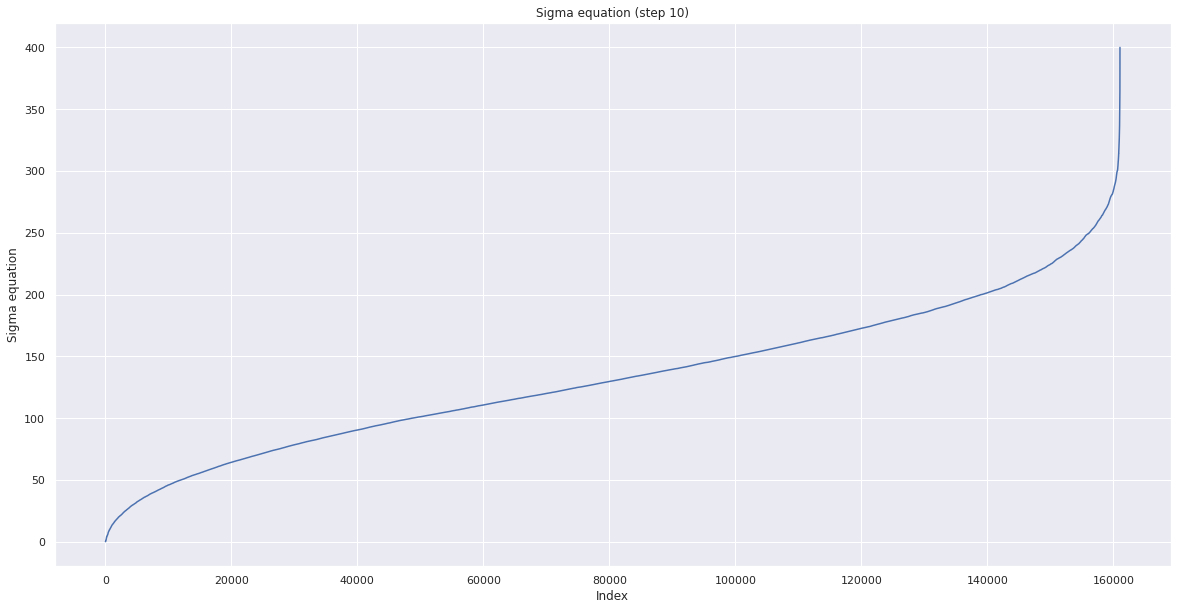

In [12]:
# visualize the flattened tensore_equazione_sigma with line plot using seaborn
fig = sns.lineplot(x=range(0, len(tensore_equazione_sigma_flat)), y=tensore_equazione_sigma_flat)
fig.set_title('Sigma equation (step 10)')
fig.set_xlabel('Index')
fig.set_ylabel('Sigma equation')
fig.figure.set_size_inches(20, 10)
plt.show()